In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_m0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.661643783386 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.63811539769 ≟ 0


In [2]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_m_f      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_m_s      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_dm_f     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_dm_s     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Plain);

┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43
┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43
┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2);

In [4]:

xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
tc_factor_full = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:full)
tc_factor_exp_1 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.001)
tc_factor_exp_2 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.05)
tc_factor_exp_3 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.1)
tc_term_full  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_full)
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, legend=:topright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1  ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")
#

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [5]:
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), size=(800,400), markershape=:auto, legend=:outerright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.001")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.05=\frac{1}{\beta}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.1")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

LoadError: UndefVarError: `tc_factor_exp_1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [6]:
plot(xr, imag(Σλ_ntc[1,:].parent), xlims=(-1,20), ylims=(-0.8,0.0),markershape=:auto, markersize=10, legend=:bottomright,label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr, full}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.001")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.01")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.1")
#plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

LoadError: UndefVarError: `Σλ_ntc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=30, λmin=-2.5, λmax=0.0, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=30, λmin=-2.5, λmax=0.0, tc=ΣTail_Full)
xr_dm_05, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.01}, λmax=0.0);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.1}, λmax=0.0);
xr_dm_06, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.15}, λmax=0.0);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.2}, λmax=0.0);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{1.0}, λmax=0.0);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:288


In [4]:
λd_min = LadderDGA.LambdaCorrection.get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

0.6816464444687931

In [5]:
lDGAhelper.mP.n

0.8298060772075676

In [6]:
μ_new, G_ladder, Σ_ladder = LadderDGA.LambdaCorrection.calc_G_Σ(χm, γm, χd, γd, λ₀, 0.0, 0.0, lDGAhelper, tc=ΣTail_ExpStep{0.15});
nd = filling_pos(G_ladder[:,0:600],  lDGAhelper.kG, lDGAhelper.mP.U, lDGAhelper.mP.μ, lDGAhelper.mP.β)

0.7972310109460726

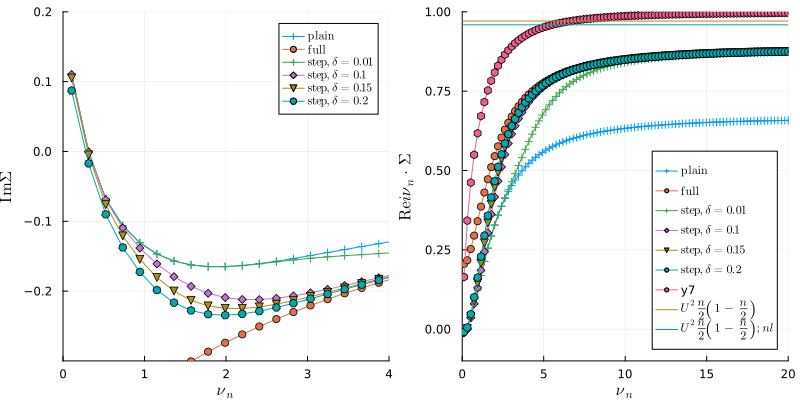

In [7]:
se_01 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Plain)
se_02 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Full)
se_03 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.01})
se_04 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.1})
se_05 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.15})
se_06 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.2});
se_07 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{1.0});

inu = LadderDGA.iν_array(χm.β, first(axes(se_01,2)):last(axes(se_01,2)))
xr = imag(inu)
p1 = plot(xr, imag(se_01[1,:].parent), label=L"\mathrm{plain}" , markershape=:auto, xlims=(0,4), ylims=(-0.3,0.2), xlabel=L"\nu_n", ylabel=L"\mathrm{Im}\Sigma")
plot!(p1, xr, imag(se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto)
plot!(p1, xr, imag(se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr, imag(se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr, imag(se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p1, xr, imag(se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)

p2 = plot(xr, real(inu .* se_01[1,:].parent), label=L"\mathrm{plain}" , markershape=:auto, xlims=(0,20), ylims=(-0.1,1.0), xlabel=L"\nu_n", ylabel=L"\mathrm{Re} i\nu_n \cdot \Sigma")
plot!(p2, xr, real(inu .* se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto)
plot!(p2, xr, real(inu .* se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr, real(inu .* se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr, real(inu .* se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p2, xr, real(inu .* se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p2, xr, real(inu .* lDGAhelper.gImp[1,0:99]), markershape=:auto)
lim_se = U^2 * (nden/2) * (1 - nden/2);
lin_se_2 = U^2 * (nd/2) * (1 - nd/2);
hline!(p2, [lim_se], label=L"U^2 \frac{n}{2} \left( 1 - \frac{n}{2} \right)")
hline!(p2, [lin_se_2], label=L"U^2 \frac{n}{2} \left( 1 - \frac{n}{2} \right); nl")

plot(p1, p2, size=(800,400))

In [8]:
lDGAhelper.gImp

1×2408 OffsetArray(::Matrix{ComplexF64}, 1:1, -1204:1203) with eltype ComplexF64 with indices 1:1×-1204:1203:
 -6.76437e-6+0.00396721im  …  -6.76437e-6-0.00396721im

In [9]:
 lDGAhelper.mP.μ

0.4

In [10]:
filling_pos(lDGAhelper.gImp[1,-1:1200], lDGAhelper.mP.U, lDGAhelper.mP.μ, lDGAhelper.mP.β)

0.824110508541318

In [22]:
lDGAhelper.mP.n

0.8298060772075676

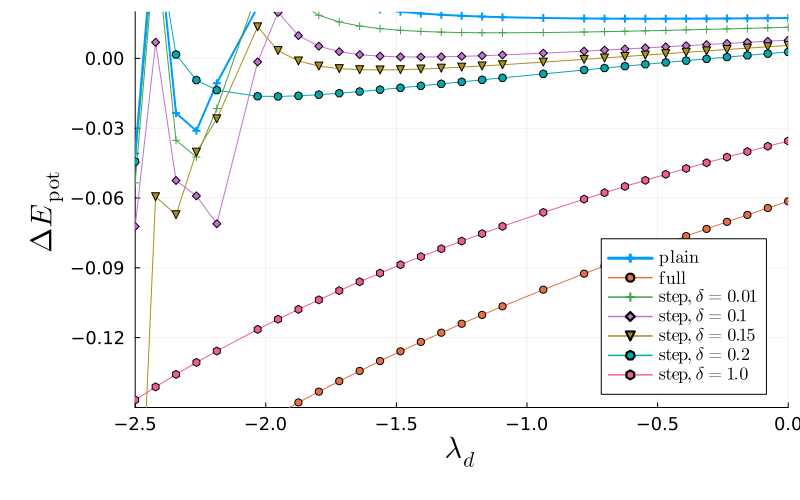

In [31]:
p = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.15,.02), xlims=(-2.5,0), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p, xr_dm_05, fr_dm_05, label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
savefig("delta_expstep_comparison.pdf")
display(p)

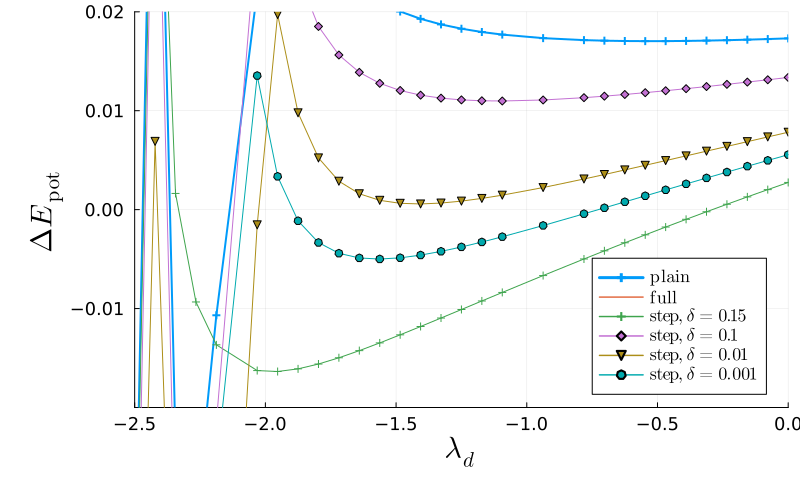

In [19]:
p = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.02,.02), xlims=(-2.5,0), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p, xr_dm_02, fr_dm_02, label=L"\mathrm{full}")
plot!(p, xr_dm_05, fr_dm_06, label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p, xr_dm_05, fr_dm_05, label=L"\mathrm{step}, \delta=0.001", markershape=:auto)

savefig("delta_expstep_comparison.pdf")
display(p)

In [31]:
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :plain);

In [34]:
se[1,:]

100-element OffsetArray(::Vector{ComplexF64}, 0:99) with eltype ComplexF64 with indices 0:99:
 0.8533244743475802 - 1.9611912155717688im
 0.7875855527171803 - 0.6958314239166015im
 0.7303574036110065 - 0.4909088504187695im
 0.6895017479048817 - 0.4129057714011241im
   0.66722292991527 - 0.37268359364415793im
 0.6588695335366503 - 0.34742527587599087im
 0.6595454019301159 - 0.32876229695525344im
 0.6655735329882733 - 0.31322020305674625im
 0.6744775431135566 - 0.2993086538623207im
 0.6846890489662275 - 0.2863938592520173im
 0.6952485277235334 - 0.2742159383369004im
 0.7055988791295594 - 0.26267417162498596im
 0.7154301103312074 - 0.251731206121971im
                    ⋮
 0.8256177217948072 - 0.049568650808307316im
 0.8257083548138209 - 0.049025906186786816im
 0.8257949299052625 - 0.048494653106130006im
 0.8258797531203573 - 0.04797443393579506im
 0.8259607452980817 - 0.04746497942168634im
 0.8260402194860375 - 0.04696585824852403im
 0.8261160641270466 - 0.046476829392286284im
 0.826190

In [8]:
using OffsetArrays
function getData(χm,γm,χd, γd,λ₀, h, λd_i; 
        tc::Symbol=LadderDGA.default_Σ_tail_correction(), 
        verbose::Bool = false)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    νmax::Int = LadderDGA.eom_ν_cutoff(h.sP)

    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = LadderDGA.iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor= LadderDGA.tail_factor(h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν; mode=tc)

    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
    λm_i   = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    χm_sum = sum_kω(h.kG, χm, λ = λm_i)
    χd_sum = sum_kω(h.kG, χd, λ = λd_i)
    PP2 = real(χd_sum + χm_sum) / 2
        verbose && println("$λm_i / $λd_i")
        # @timeit to "dbg3" μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_factor, χm, γm, χd, γd, λ₀, λm_i, λd_i, h; fix_n = fix_n)
        if isfinite(λm_i)
            (λm_i != 0) && χ_λ!(χm, λm_i)
            (λd_i != 0) && χ_λ!(χd, λd_i)
            tc_term  = LadderDGA.LambdaCorrection.tail_correction_term(sum_kω(h.kG, χm), h.χloc_m_sum, tc_factor)
                LadderDGA.calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, tc_term, h.gLoc_rfft, h.kG, h.mP, h.sP)
            (λm_i != 0) && reset!(χm)
            (λd_i != 0) && reset!(χd)
            μ_new = LadderDGA.G_from_Σladder!(G_ladder, Σ_ladder, h.Σ_loc, h.kG, h.mP; fix_n = true, μ = h.mP.μ, n = h.mP.n)
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            return λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder
        else
            return NaN
        end
end

getData (generic function with 1 method)

In [9]:
Epot2_l = []
Epot1_l = []
Ekin1_l = []
Σ_l     = []
Σ0_l     = []
G_l     = []
μ_l     = []
PP2_l   = []
λm_l    = []
reset!(χm)
reset!(χd)
for λd_i in xr_dm_01
    λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i)
    push!(Epot2_l,Epot_2)
    push!(Epot1_l,Epot_1)
    push!(Σ_l,Σ_ladder)
    push!(Σ0_l,maximum(imag(Σ_ladder[:,0])))
    push!(G_l,G_ladder)
    push!(μ_l,μ_new)
    push!(PP2_l,PP2)
    push!(λm_l,λm_i)
end

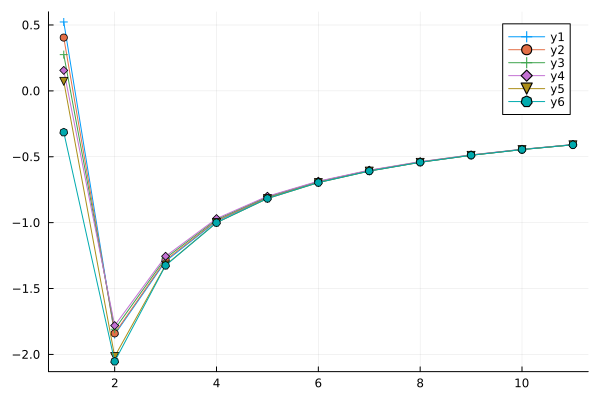

In [10]:
p = plot()
for i in 1:6
    plot!(p,imag(G_l[i][1,0:10]), markershape=:auto)
end
display(p)

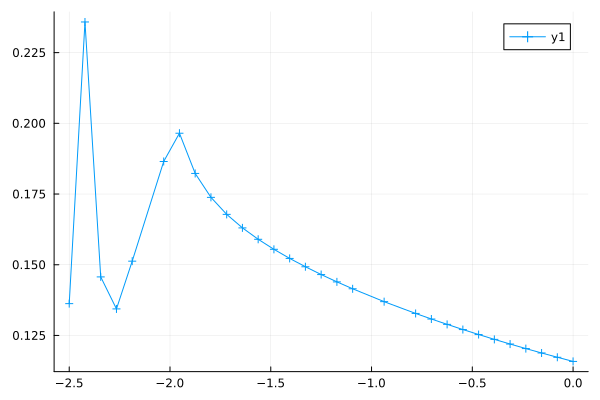

In [11]:
plot(xr_dm_01, Epot1_l, markershape=:auto)

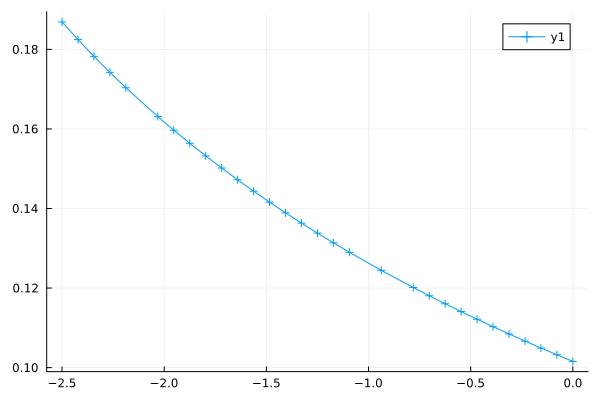

In [12]:
plot(xr_dm_01, Epot2_l, markershape=:auto)

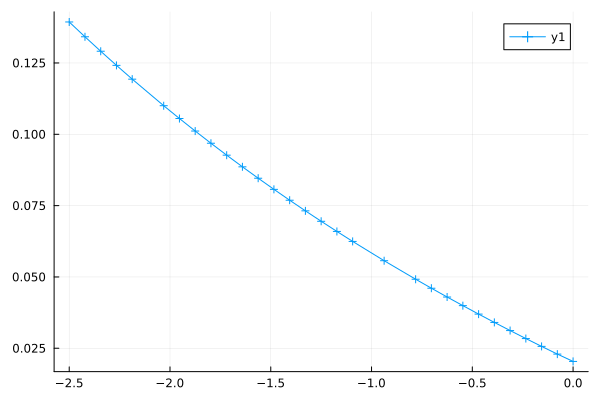

In [13]:
plot(xr_dm_01, Σ0_l, markershape=:auto)

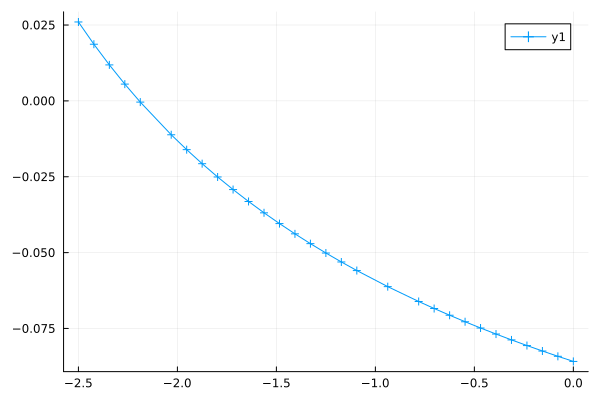

In [14]:
plot(xr_dm_01, λm_l, markershape=:auto)

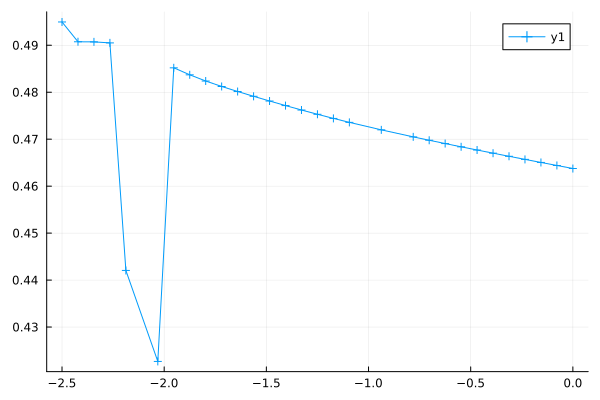

In [15]:
plot(xr_dm_01, μ_l, markershape=:auto)

In [16]:
λd_range = LinRange(-9.5, -5.0, 100)
se_ntc_list = []
se_ftc_list = []
se_etc_list = []
largest_ind_ntc = []
largest_ind_ftc = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    _,ind = findmax(imag(se_ntc[:,0]))
    push!(largest_ind_ntc, ind)
    _,ind = findmax(imag(se_ftc[:,0]))
    push!(largest_ind_ftc, ind)
    push!(se_ntc_list, imag(se_ntc[end-5,0]))
    push!(se_ftc_list, imag(se_ftc[end-5,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

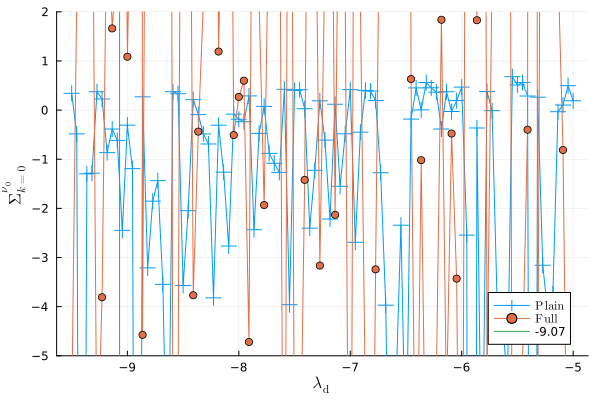

In [17]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-5,2), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
#plot!(λd_range, se_etc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Step}")
vline!([-9.07], label="-9.07")

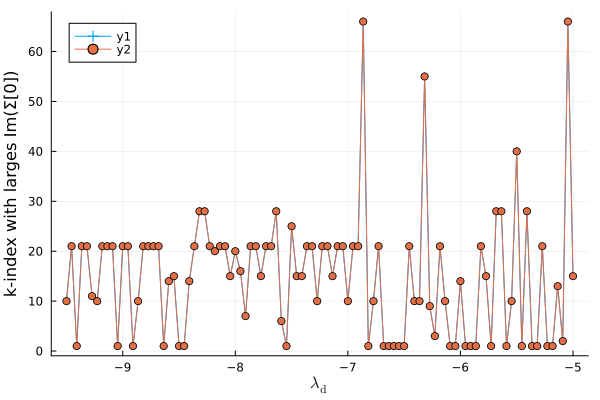

In [18]:
plot(λd_range,largest_ind_ntc, markershape=:auto,  xlabel=L"\lambda_\mathrm{d}", ylabel="k-index with larges Im(Σ[0])")
plot!(λd_range,largest_ind_ftc, markershape=:auto)

In [19]:
λd_range = LinRange(-10.5, 30.0, 100)
se_ntc_list = []
se_ftc_list = []
#se_etc_list = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    push!(se_ntc_list, imag(se_ntc[1,0]))
    push!(se_ftc_list, imag(se_ftc[1,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

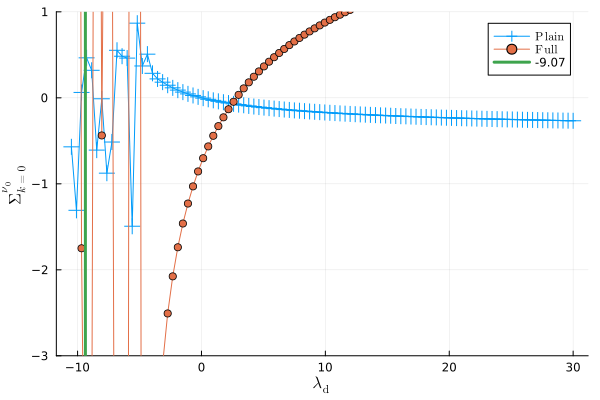

In [20]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-3,1), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
vline!([-9.37], label="-9.07", linewidth=3)

In [21]:
function get_λd_min(χm::χT, γm::γT, χd::χT, γd::γT, λ₀::Array{ComplexF64,3}, h::lDΓAHelper; 
                    λd_max::Float64=0.0, Δλ::Float64 = 1e-1, dΣ0_max::Float64=0.5, dΣ0_threshold::Float64=4.0)::Float64
    nh = ω0_index(χd)
    Nq = length(h.kG.kMult)
    λd_min0 = -minimum(1 ./ view(χd, :, nh)) + Δλ
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, 1), 1:Nq, 0:0)
    
    λd_max = (λd_max - λd_min0) < 5 ? λd_max + 5 : λd_max
    λd_max_result = λd_max
    
    λd_grid = reverse(LinRange(λd_min0, λd_max, ceil(Int, (λd_max-λd_min0)/Δλ)))
    Σ0_λ_i::Float64 = NaN
    Σ0_λ_im::Float64 = NaN
    dΣ0_λ_last::Float64 = 0.0
    dΣ0_max::Float64 = 0.0
    
    for (i,λd_i) in enumerate(λd_grid)
        rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
        λm_i =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
        (λm_i != 0) && χ_λ!(χm, λm_i)
        (λd_i != 0) && χ_λ!(χd, λd_i)
        calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, 0.0, h.gLoc_rfft, h.kG, h.mP, h.sP)
        (λm_i != 0) && reset!(χm)
        (λd_i != 0) && reset!(χd)
        Σ0_λ_i, ind = findmax(imag(Σ_ladder[:,0]))
        if i > 1
            dΣ0_λ_last = abs((Σ0_λ_im - Σ0_λ_i)/(λd_grid[i-1] - λd_grid[i]))
            Σ0_λ_im = Σ0_λ_i
        end
        if i > 2 && (Σ0_λ_i > 0 || dΣ0_λ_last > dΣ0_threshold)
            λd_max_result = λd_i
            break
        end
    end
    return λd_max_result
end

get_λd_min (generic function with 1 method)

In [22]:
using OffsetArrays, TimerOutputs
ω0_index = LadderDGA.ω0_index
calc_Σ! = LadderDGA.calc_Σ!
lmax = get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

0.6816464444687953

In [23]:
plot(xr[2:end], tt, markershape=:auto)
plot!(xr[1:end], t1, markershape=:auto, xlims=(-10,-5))
vline!([lmax])

LoadError: UndefVarError: `xr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [24]:
a = randn(4,5)

4×5 Matrix{Float64}:
 0.430074   0.692606   0.157479   -1.16737   -1.00097
 0.923283  -1.04182   -1.75685    -1.74929    0.890071
 0.461577  -0.382608  -0.0640245   0.496857   0.024959
 0.642825   0.396787  -0.631392    0.740379   0.316986

In [25]:
maximum(a)

0.9232832239349604

# Reasoning

 = Enhancement of charge fluctuations make system more metallic -> Sigma(nu_0) gets closer to 0.

 = tail correction term inverts behavior since the difference between magnetic channels now dominates low frequency behavior.

 = Step function and lambda-density cutoff seems to be correct way.